In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,confusion_matrix,make_scorer
import pickle
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
data=pd.read_csv('cleaned_data01.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 104 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(31), int64(46), object(27)
memory usage: 1.1+ GB


In [6]:
data.shape

(1413701, 104)

In [7]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.

In [8]:
## Remove unwanted columns
Remove_col=["SK_ID_CURR", "AMT_REQ_CREDIT_BUREAU_HOUR" ,"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_QRT","CNT_CHILDREN", "NAME_TYPE_SUITE_x", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_PHONE", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START_x", "HOUR_APPR_PROCESS_START_x", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "EXT_SOURCE_2", "EXT_SOURCE_3", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "SK_ID_PREV", "NAME_CONTRACT_TYPE_y", "WEEKDAY_APPR_PROCESS_START_y", "HOUR_APPR_PROCESS_START_y", "NFLAG_LAST_APPL_IN_DAY", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "SELLERPLACE_AREA", "NAME_SELLER_INDUSTRY", "CNT_PAYMENT", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION", "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_TERMINATION","OBS_30_CNT_SOCIAL_CIRCLE",	"DEF_30_CNT_SOCIAL_CIRCLE",	"OBS_60_CNT_SOCIAL_CIRCLE",	"DEF_60_CNT_SOCIAL_CIRCLE"]

In [9]:
len(Remove_col)

70

In [10]:
data.drop(Remove_col,axis=1, inplace=True)

In [11]:
data.shape

(1413701, 34)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 2   CODE_GENDER                  1413701 non-null  object 
 3   FLAG_OWN_CAR                 1413701 non-null  object 
 4   FLAG_OWN_REALTY              1413701 non-null  object 
 5   AMT_INCOME_TOTAL             1413701 non-null  float64
 6   AMT_CREDIT_x                 1413701 non-null  float64
 7   AMT_ANNUITY_x                1413701 non-null  float64
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64
 9   NAME_INCOME_TYPE             1413701 non-null  object 
 10  DAYS_BIRTH                   1413701 non-null  int64  
 11  DAYS_EMPLOYED                1413701 non-null  int64  
 12  DAYS_REGISTRATION            1413701 non-n

In [13]:
data.head(1)

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,-9461,-637,-3648.0,-2120,1,1,0,Laborers,Business Entity Type 3,-1134.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,XAP,Approved,-606,New,-25.0,0.0


In [14]:
data.isnull().mean()*100

TARGET                         0.0
NAME_CONTRACT_TYPE_x           0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT_x                   0.0
AMT_ANNUITY_x                  0.0
AMT_GOODS_PRICE_x              0.0
NAME_INCOME_TYPE               0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_CONT_MOBILE               0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
ORGANIZATION_TYPE              0.0
DAYS_LAST_PHONE_CHANGE         0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_YEAR     0.0
AMT_ANNUITY_y                  0.0
AMT_APPLICATION                0.0
AMT_CREDIT_y                   0.0
AMT_GOODS_PRICE_y              0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NAME_CASH_LOAN_PURPO

In [15]:
d1=data.copy()

## convert negative values into positive values

In [16]:

days_col=["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE", "DAYS_DECISION"]

In [17]:
## convert negative values into positive values

for col in days_col:
    d1[col]=d1[col].abs()

In [18]:
d1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,9461,637,3648.0,2120,1,1,0,Laborers,Business Entity Type 3,1134.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,98356.995,900000.0,1035882.0,900000.0,Y,XNA,Approved,746,Repeater,-536.0,1.0
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,64567.665,337500.0,348637.5,337500.0,Y,XAP,Approved,828,Refreshed,-647.0,0.0
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,6737.310,68809.5,68053.5,68809.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,19046,225,4260.0,2531,1,1,0,Laborers,Government,815.0,0.0,0.0,0.0,5357.250,24282.0,20106.0,24282.0,Y,XAP,Approved,815,New,-724.0,0.0


In [19]:
d1.duplicated().sum()

np.int64(64641)

In [20]:
d1.drop_duplicates(inplace=True)

In [21]:
d1.duplicated().sum()

np.int64(0)

In [22]:
d1.shape

(1349060, 34)

In [23]:
d1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,9461,637,3648.0,2120,1,1,0,Laborers,Business Entity Type 3,1134.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,98356.995,900000.0,1035882.0,900000.0,Y,XNA,Approved,746,Repeater,-536.0,1.0
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,64567.665,337500.0,348637.5,337500.0,Y,XAP,Approved,828,Refreshed,-647.0,0.0
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,16765,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,6737.310,68809.5,68053.5,68809.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,19046,225,4260.0,2531,1,1,0,Laborers,Government,815.0,0.0,0.0,0.0,5357.250,24282.0,20106.0,24282.0,Y,XAP,Approved,815,New,-724.0,0.0


In [24]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1349060 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1349060 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         1349060 non-null  object 
 2   CODE_GENDER                  1349060 non-null  object 
 3   FLAG_OWN_CAR                 1349060 non-null  object 
 4   FLAG_OWN_REALTY              1349060 non-null  object 
 5   AMT_INCOME_TOTAL             1349060 non-null  float64
 6   AMT_CREDIT_x                 1349060 non-null  float64
 7   AMT_ANNUITY_x                1349060 non-null  float64
 8   AMT_GOODS_PRICE_x            1349060 non-null  float64
 9   NAME_INCOME_TYPE             1349060 non-null  object 
 10  DAYS_BIRTH                   1349060 non-null  int64  
 11  DAYS_EMPLOYED                1349060 non-null  int64  
 12  DAYS_REGISTRATION            1349060 non-null  

In [25]:
d1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_CLIENT_TYPE', 'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [26]:
d1.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
count,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1349060.0,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06,1.349060e+06
mean,8.583532e-02,1.729428e+05,5.884404e+05,2.702328e+04,5.285605e+05,1.630071e+04,7.218373e+04,5.002453e+03,3.034208e+03,1.0,9.992454e-01,7.209390e-02,1.087571e+03,3.837746e-02,3.018865e-01,2.870560e+00,1.582026e+04,1.819662e+05,2.039335e+05,2.259085e+05,9.081049e+02,7.666929e+04,3.305461e-01
std,2.801208e-01,2.021142e+05,3.856972e+05,1.395867e+04,3.537887e+05,4.341780e+03,1.429621e+05,3.546346e+03,1.506955e+03,0.0,2.745962e-02,2.586434e-01,8.001886e+02,1.998765e-01,9.240867e-01,2.055935e+00,1.328659e+04,2.965649e+05,3.225519e+05,2.828307e+05,7.879437e+02,1.190089e+05,3.739419e-01
min,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.889000e+03,0.000000e+00
25%,0.000000e+00,1.125000e+05,2.700000e+05,1.680750e+04,2.385000e+05,1.271900e+04,1.042000e+03,2.006000e+03,1.783000e+03,1.0,1.000000e+00,0.000000e+00,3.990000e+02,0.000000e+00,0.000000e+00,1.000000e+00,7.138744e+03,2.560590e+04,3.033450e+04,6.299100e+04,2.850000e+02,-7.960000e+02,0.000000e+00
50%,0.000000e+00,1.575000e+05,5.084955e+05,2.493450e+04,4.500000e+05,1.601600e+04,2.398000e+03,4.509000e+03,3.329000e+03,1.0,1.000000e+00,0.000000e+00,1.020000e+03,0.000000e+00,0.000000e+00,2.912612e+00,1.415020e+04,7.726050e+04,8.775000e+04,1.484910e+05,6.230000e+02,7.666563e+04,3.305720e-01
75%,0.000000e+00,2.070000e+05,8.086500e+05,3.457350e+04,6.795000e+05,1.995000e+04,6.250000e+03,7.506000e+03,4.318000e+03,1.0,1.000000e+00,0.000000e+00,1.686000e+03,0.000000e+00,3.013734e-01,4.000000e+00,1.726072e+04,1.935000e+05,2.250000e+05,2.264512e+05,1.364000e+03,7.666563e+04,3.305720e-01
max,1.000000e+00,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,2.520100e+04,3.652430e+05,2.467200e+04,7.197000e+03,1.0,1.000000e+00,1.000000e+00,4.292000e+03,8.000000e+00,2.700000e+01,2.500000e+01,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,3.652430e+05,1.000000e+00


In [27]:
d1['TARGET'].value_counts()

TARGET
0    1233263
1     115797
Name: count, dtype: int64

In [28]:
d1[d1['TARGET']==1]['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 56855
Sales staff              14319
Drivers                   9633
Core staff                7656
Managers                  6401
Security staff            3507
High skill tech staff     3175
Cooking staff             2942
Medicine staff            2829
Accountants               2270
Cleaning staff            2119
Low-skill Laborers        1678
Private service staff      745
Waiters/barmen staff       630
Secretaries                431
Realty agents              334
HR staff                   158
IT staff                   115
Name: count, dtype: int64

In [29]:
d1['DAYS_BIRTH'].unique()

array([ 9461, 16765, 19046, ...,  7857, 25061, 24864])

In [30]:

d1['Age']=d1['DAYS_BIRTH']//365.25

In [31]:
d1.drop('DAYS_BIRTH',axis=1, inplace=True)

In [32]:
## separating based on age group

def Age_group(age):
    if age >=20 and age <= 35:
        return 'Adult'
    elif age >=36 and age <= 60:
        return 'Middle-age'
    else:
        return 'Senior'
d1['Age_group'] = d1['Age'].apply(Age_group)

In [33]:
d1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,Age,Age_group
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,637,3648.0,2120,1,1,0,Laborers,Business Entity Type 3,1134.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0,25.0,Adult
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,98356.995,900000.0,1035882.0,900000.0,Y,XNA,Approved,746,Repeater,-536.0,1.0,45.0,Middle-age
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,64567.665,337500.0,348637.5,337500.0,Y,XAP,Approved,828,Refreshed,-647.0,0.0,45.0,Middle-age
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,6737.310,68809.5,68053.5,68809.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0,45.0,Middle-age
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,225,4260.0,2531,1,1,0,Laborers,Government,815.0,0.0,0.0,0.0,5357.250,24282.0,20106.0,24282.0,Y,XAP,Approved,815,New,-724.0,0.0,52.0,Middle-age


In [34]:
d1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_CLIENT_TYPE', 'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL', 'Age',
       'Age_group'],
      dtype='object')

In [35]:
## Heatmap

In [36]:

# Separate categorical and numerical columns
categorical_cols = d1.select_dtypes(include=['object', 'category'])


In [37]:
numerical_cols = d1.select_dtypes(include=['int64', 'float64'])

In [38]:
correlation_matrix = numerical_cols.corr()

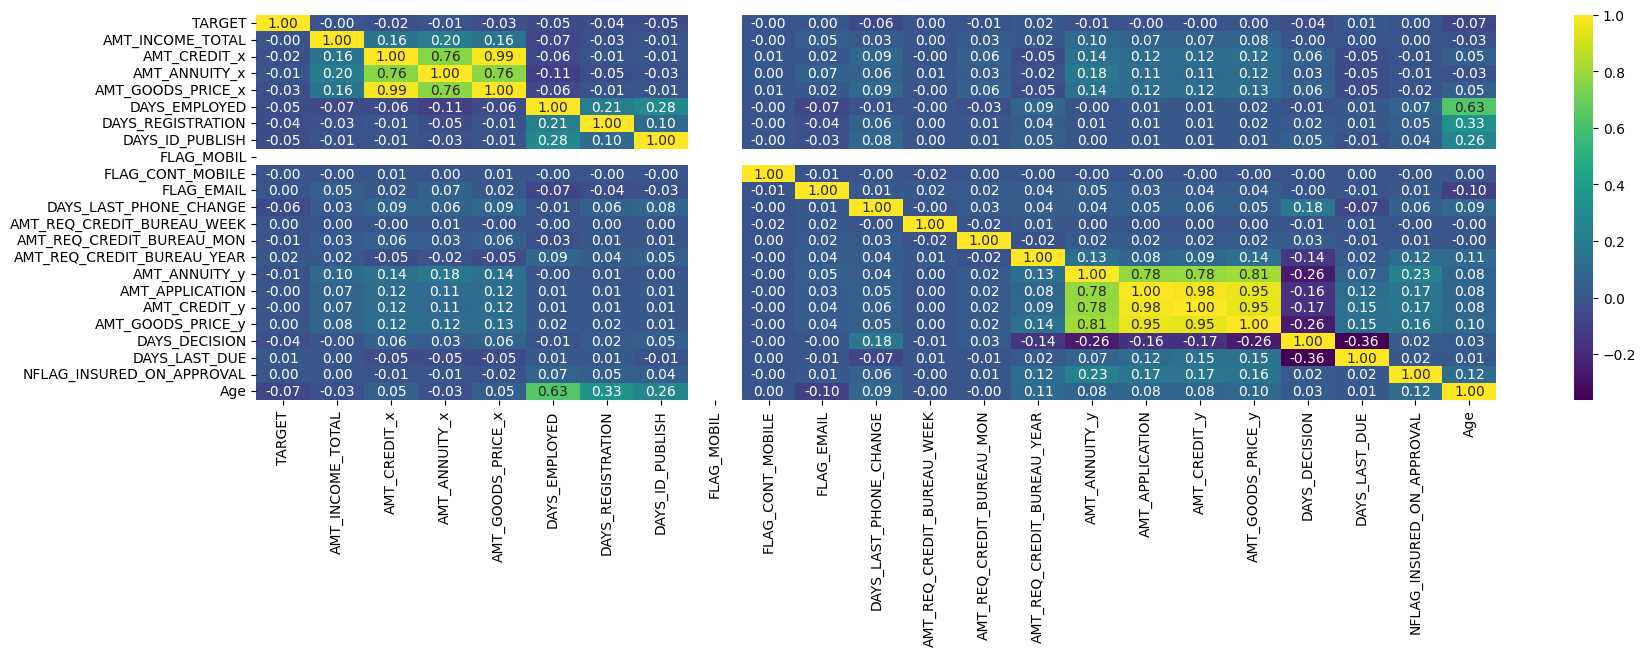

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(data=numerical_cols.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [40]:
d1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,Age,Age_group
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,637,3648.0,2120,1,1,0,Laborers,Business Entity Type 3,1134.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0,25.0,Adult
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,98356.995,900000.0,1035882.0,900000.0,Y,XNA,Approved,746,Repeater,-536.0,1.0,45.0,Middle-age
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,64567.665,337500.0,348637.5,337500.0,Y,XAP,Approved,828,Refreshed,-647.0,0.0,45.0,Middle-age
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,6737.310,68809.5,68053.5,68809.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0,45.0,Middle-age
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,225,4260.0,2531,1,1,0,Laborers,Government,815.0,0.0,0.0,0.0,5357.250,24282.0,20106.0,24282.0,Y,XAP,Approved,815,New,-724.0,0.0,52.0,Middle-age


## Removing highly correlated AMT_GOODS_PRICE_y AMT_CREDIT_x

In [41]:
d1=d1.drop(['AMT_GOODS_PRICE_y','AMT_GOODS_PRICE_x','AMT_APPLICATION','AMT_ANNUITY_y'],axis=1)

In [42]:
d1=d1.drop(['Age'],axis=1)

In [43]:
d1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,Age_group
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,637,3648.0,2120,1,1,0,Laborers,Business Entity Type 3,1134.0,0.0,0.0,1.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0,Adult
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,1035882.0,Y,XNA,Approved,746,Repeater,-536.0,1.0,Middle-age
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,348637.5,Y,XAP,Approved,828,Refreshed,-647.0,0.0,Middle-age
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,1186.0,291,1,1,0,Core staff,School,828.0,0.0,0.0,0.0,68053.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0,Middle-age
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,225,4260.0,2531,1,1,0,Laborers,Government,815.0,0.0,0.0,0.0,20106.0,Y,XAP,Approved,815,New,-724.0,0.0,Middle-age


In [44]:
d1.shape

(1349060, 30)

In [45]:
for col in d1.columns:
    print('Unique Values of ' + col +':')
    print(d1[col].unique())
    print("========================")


Unique Values of TARGET:
[1 0]
Unique Values of NAME_CONTRACT_TYPE_x:
['Cash loans' 'Revolving loans']
Unique Values of CODE_GENDER:
['M' 'F' 'XNA']
Unique Values of FLAG_OWN_CAR:
['N' 'Y']
Unique Values of FLAG_OWN_REALTY:
['Y' 'N']
Unique Values of AMT_INCOME_TOTAL:
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Unique Values of AMT_CREDIT_x:
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Unique Values of AMT_ANNUITY_x:
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Unique Values of NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Maternity leave']
Unique Values of DAYS_EMPLOYED:
[  637  1188   225 ... 12971 11084  8694]
Unique Values of DAYS_REGISTRATION:
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
Unique Values of DAYS_ID_PUBLISH:
[2120  291 2531 ... 5906 5854 6211]
Unique Values of FLAG_MOBIL:
[1]
Unique Values of FLAG_CONT_MOBILE:
[1 0]
Unique Values of FLAG_EMAIL:
[0 1]
Unique Valu

In [46]:
for i in d1['AMT_INCOME_TOTAL'].unique():
    print(i)

202500.0
270000.0
67500.0
135000.0
121500.0
99000.0
171000.0
360000.0
112500.0
38419.155
225000.0
189000.0
157500.0
108000.0
81000.0
90000.0
450000.0
83250.0
292500.0
198000.0
180000.0
130500.0
540000.0
76500.0
324000.0
103500.0
94500.0
72000.0
193500.0
315000.0
243000.0
54000.0
126000.0
162000.0
117000.0
247500.0
144000.0
175500.0
58500.0
119250.0
164250.0
216000.0
63000.0
49500.0
337500.0
85500.0
308250.0
153000.0
87750.0
36000.0
382500.0
166500.0
69750.0
45000.0
630000.0
405000.0
472500.0
40500.0
148500.0
211500.0
252000.0
111919.5
184500.0
31500.0
106398.0
229500.0
207000.0
234000.0
265500.0
38250.0
288000.0
279000.0
306000.0
90288.0
139500.0
213750.0
214650.0
48600.0
261000.0
283500.0
238500.0
195750.0
173250.0
182250.0
124200.0
400500.0
123300.0
328500.0
132075.0
522000.0
168930.0
310500.0
46948.5
67050.0
156600.0
810000.0
247891.5
89100.0
96453.0
346500.0
364500.0
72450.0
140850.0
76995.0
51750.0
234823.5
301500.0
675000.0
115200.0
720000.0
220500.0
697500.0
378000.0
25650.0
193

# Data Visualization

In [47]:
## Target distribution EDA

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12428\2215948420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = d1, x = 'NAME_CONTRACT_TYPE_x', palette='cubehelix')


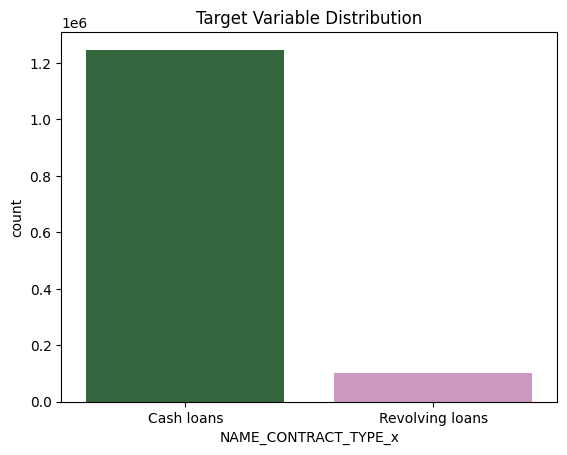

In [48]:
sns.countplot(data = d1, x = 'NAME_CONTRACT_TYPE_x', palette='cubehelix')
plt.title('Target Variable Distribution')
plt.show()

## High count for cash loans

In [49]:
## Distribution of OCCUPATION_TYPE type

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12428\142386663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(d1[d1["TARGET"]==1]["OCCUPATION_TYPE"],palette='deep')


Text(0.5, 1.0, 'Distribution of OCCUPATION_TYPE')

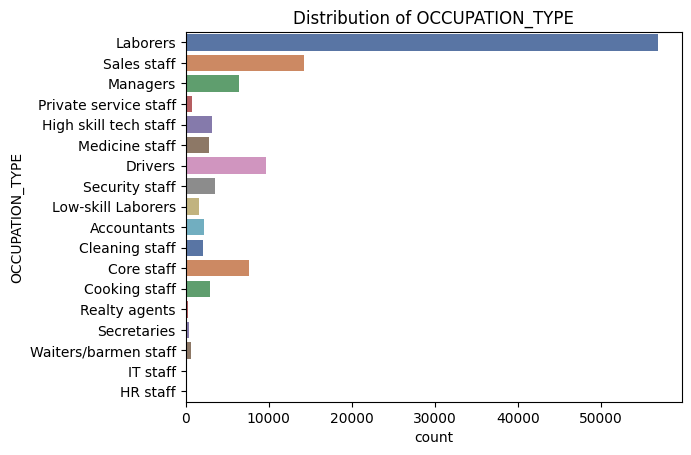

In [50]:
#count plot which client as payment difficulties
sns.countplot(d1[d1["TARGET"]==1]["OCCUPATION_TYPE"],palette='deep')
plt.title("Distribution of OCCUPATION_TYPE")

## Laborers and sales staff facing diffculty in paying loans

In [51]:
## Distribution of income type

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_12428\1155830014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NAME_INCOME_TYPE', data=data, order=d1['NAME_INCOME_TYPE'].value_counts().index, palette='mako')


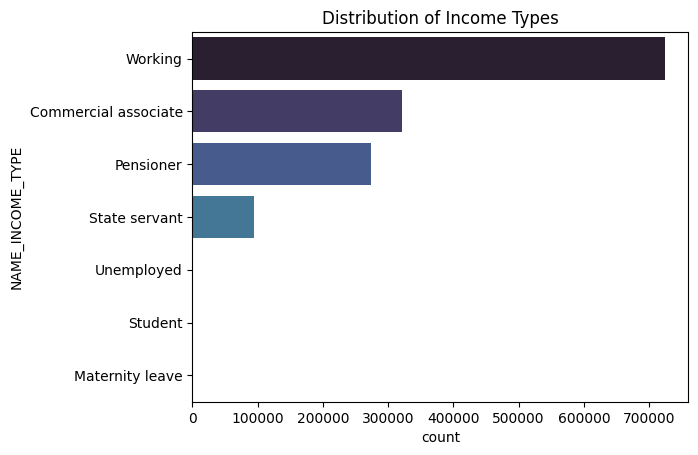

In [52]:
sns.countplot(y='NAME_INCOME_TYPE', data=data, order=d1['NAME_INCOME_TYPE'].value_counts().index, palette='mako')
plt.title('Distribution of Income Types')
plt.show()

## High income type for working professionals

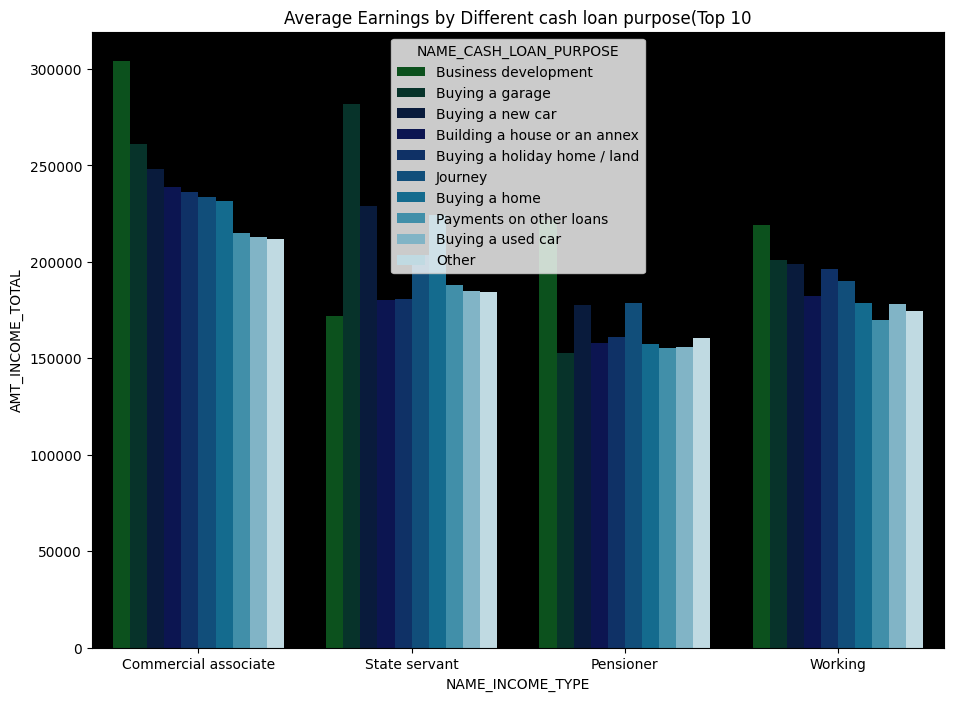

In [83]:
edu = d1.groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

top_10_purpose = edu.groupby('NAME_CASH_LOAN_PURPOSE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False).head(10).index
edu_top_10 = edu[edu['NAME_CASH_LOAN_PURPOSE'].isin(top_10_purpose)]

# Create the bar plot
fig = plt.figure(figsize=(11, 8))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=edu_top_10, hue='NAME_CASH_LOAN_PURPOSE', palette="ocean")
ax.set_facecolor("k")
plt.title("Average Earnings by Different cash loan purpose(Top 10")
plt.show()

## Highly cash loan purpose made for Business Development , Buying garage , Buying new car and buying new house

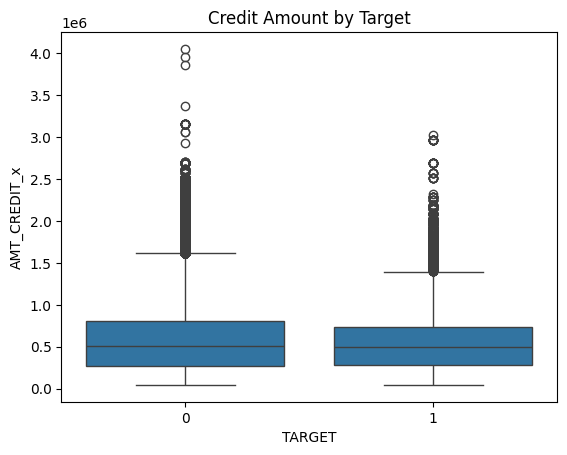

In [53]:
sns.boxplot(data=d1, x='TARGET', y='AMT_CREDIT_x')
plt.title('Credit Amount by Target')
plt.show()

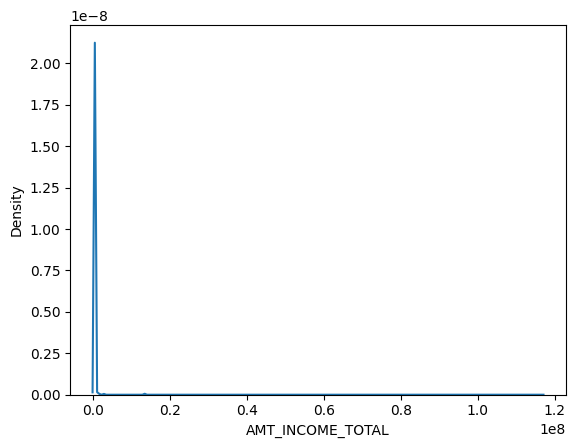

In [54]:
sns.kdeplot(data = d1, x = 'AMT_INCOME_TOTAL')
plt.show()

In [55]:
d2=d1[['OCCUPATION_TYPE','CODE_GENDER','NAME_INCOME_TYPE','Age_group']].groupby("CODE_GENDER").value_counts().reset_index(name="Count")

In [56]:
d2.head()

,CODE_GENDER,OCCUPATION_TYPE,NAME_INCOME_TYPE,Age_group,Count
0,F,Laborers,Pensioner,Middle-age,117909
1,F,Laborers,Working,Middle-age,102935
2,F,Laborers,Pensioner,Senior,100782
3,F,Sales staff,Working,Middle-age,52171
4,F,Laborers,Working,Adult,43266


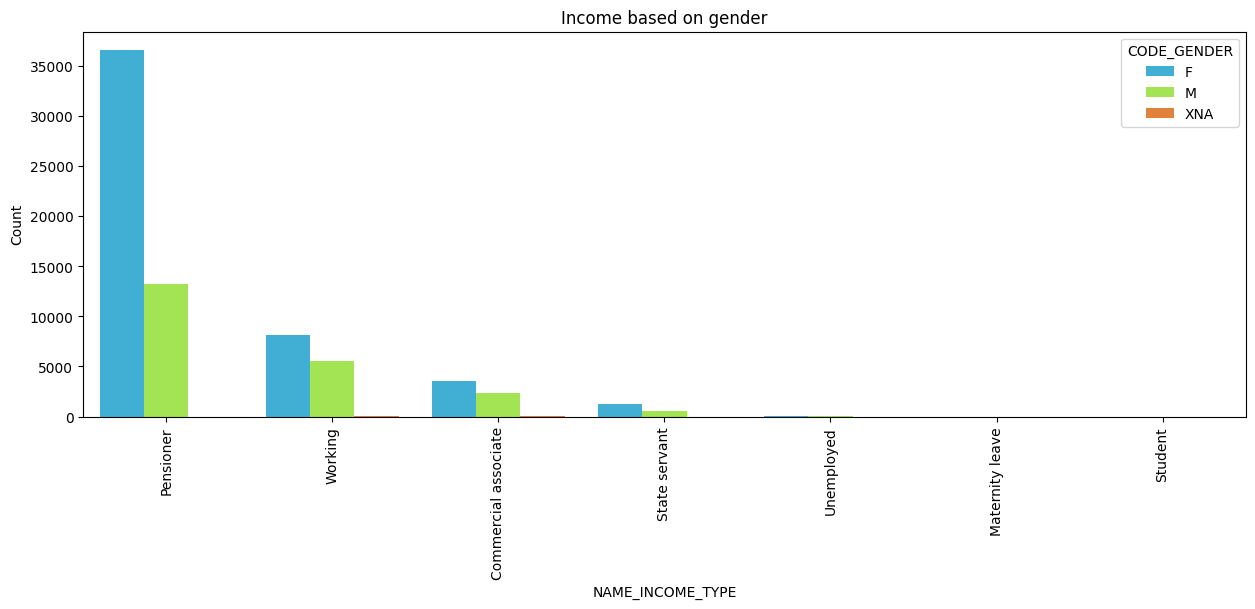

In [57]:
plt.figure(figsize=(15,5))
sns.color_palette(palette='rocket_r')
plt.xticks(rotation=90)
plt.title("Income based on gender")
sns.barplot(data=d2,x="NAME_INCOME_TYPE",y="Count",hue="CODE_GENDER",errorbar=None,palette='turbo')
plt.show()

## Top income type are Pensioner and Working professionals 
## |Comparing male , females are earning more income

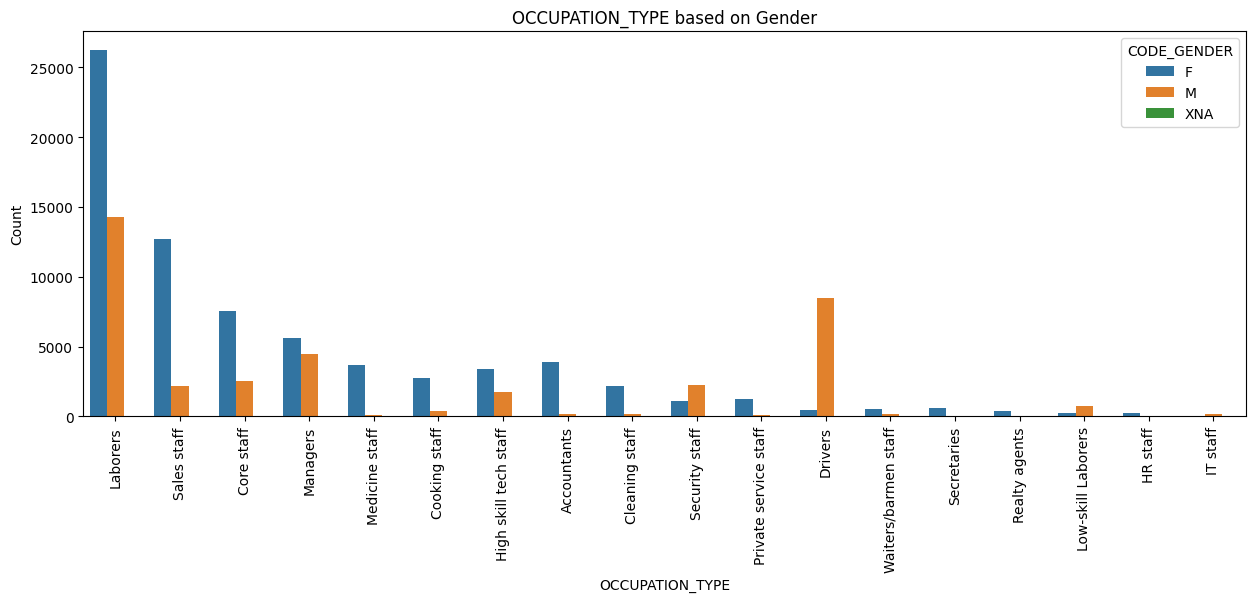

In [65]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('OCCUPATION_TYPE based on Gender')
sns.barplot(data=d2,x="OCCUPATION_TYPE",y="Count",hue="CODE_GENDER",errorbar=None)
plt.show()

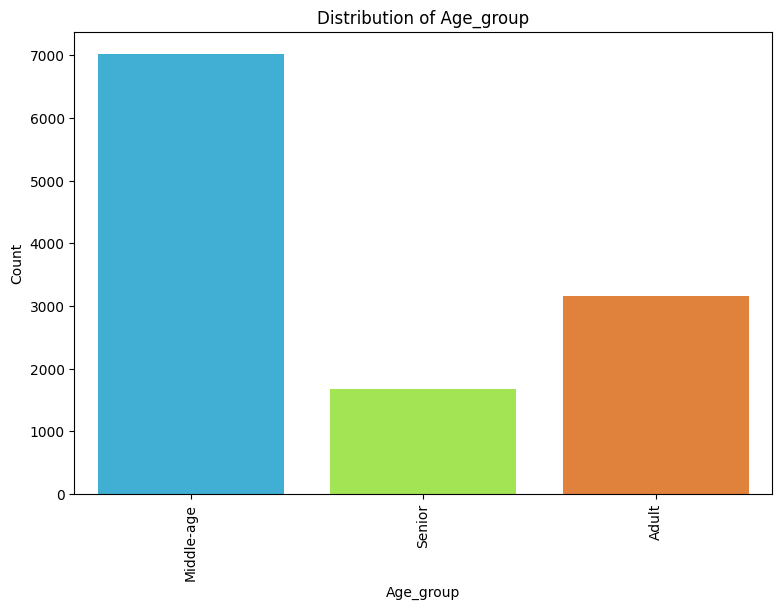

In [59]:
plt.figure(figsize=(9,6))
sns.color_palette(palette='rocket_r')
plt.xticks(rotation=90)
plt.title("Distribution of Age_group")
sns.barplot(data=d2,x="Age_group",y="Count",hue="Age_group",errorbar=None,palette='turbo')
plt.show()

## Highly middle age people involved in loan 

In [84]:
d1.to_csv('d1.csv', index=False)

In [87]:
import os

In [88]:
cwd = os.getcwd()

In [89]:
cwd

'C:\\Users\\SG_LENOVO\\Downloads'